In [1]:
#pip install mlxtend

<h1 style="font-family:Calibri;color:black;font-size:197%;text-align:center">Master Data science - a.a. 2022-2023 
Final Project of Machine Learning</h1>
<h1 style=";font-family:Calibri;color:violet;font-size:170%;text-align:center;border-radius: px 50px;"> student: Laura Proto </h1>

<h1 style="background-color:#eaeaea;font-family:Calibri;color:#fe0b50;font-size:300%;text-align:center;border-radius: 50px;padding: 10px">The Stroke Prediction Dataset</h1>

In [2]:
from PIL import Image
from IPython.display import display, HTML
display(HTML("<div style='display:flex; justify-content:center;'><img src='stroke-main.jpg' style='max-width:100%;'></div>"))

## Il Dataset

Stroke is a serious medical condition that is the second leading cause of death worldwide, according to the World Health Organisation (WHO); it accounts for about 11% of all recorded deaths. 

Stroke occurs suddenly, even in people in good health, when the supply of oxygenated blood to the brain is interrupted or when haemorrhaging occurs in an area of the brain. This causes the death of nerve cells in the affected area. As a result, neurological functions controlled by that specific area are lost, such as limb movement, speech, vision, hearing, balance and other functions.

In this dataset*, several input variables such as gender, age, presence of other diseases and smoking status are considered to determine a patient's stroke risk.

In Italy, stroke is the second leading cause of death, after ischaemic heart disease. It is responsible for 9-10% of all deaths in the country and is the main cause of disability.


*fonte: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Index</h1>

- [Libraries & Utilities](#1)
- [Data Preprocessing](#2)
    - [Importing Dataset](#2.1)
    - [Analysis of values](#2.2)
    - [Definition of the Data Transformation Pipeline](#2.3)
- [Model Selection: stroke](#3)
    - [Outcome](#3.1)
    - [Refinement of the selected model](#3.2)
    - [Learning curve](#3.3)
- [Conclusions](#4)

<a id = '1'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:blue;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Libraries</h1>

In [3]:
import utils as ut
import pandas as pd
import numpy as np
import seaborn as sns 
import itertools
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px

from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import display, HTML
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import loguniform, beta, uniform
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline


import warnings
warnings.filterwarnings('ignore')

<a id = '2'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Data Preprocessing</h1>

<a id = '2.1'></a>
<h1 style="font-size: 150%;">Importing Data set </h1>

In [4]:
#loading data
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter = ',')

In [5]:
#Dataframe 
df_stroke.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [6]:
#Dataset shape
print(f'Dataset has {df_stroke.shape[0]} rows and {df_stroke.shape[1]} columns')

Dataset has 5110 rows and 12 columns


<a id = '2.2'></a>
<h1 style="font-size: 150%;">Analysis of values</h1>

In [7]:
#info about DataFrame
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are three types of data in the dataset:
1. **object** (categorical) : gender, ever_married, work_type, Residence_type, smoking_status
2. **int64** (binary) : hypertension,heart_disease, stroke
3. **float64** (numerical) : age, avg_glucose_level, bmi

In [8]:
#unique column values with categorical data type
for col in df_stroke.select_dtypes('object').columns:
    print(col + "'s value:", df_stroke[col].unique().tolist())

gender's value: ['Male', 'Female', 'Other']
ever_married's value: ['Yes', 'No']
work_type's value: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_type's value: ['Urban', 'Rural']
smoking_status's value: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']


In [9]:
#percentages of unknown values in the column smoking_status
counts = df_stroke['smoking_status'].value_counts()
num_unknown = counts.get('Unknown', 0)
total = df_stroke['smoking_status'].count()
percentage = (num_unknown / total) * 100
print(f"Percentage of 'Unknown' values in smoking_status's coloumn: {percentage:.2f}%")

Percentage of 'Unknown' values in smoking_status's coloumn: 30.22%


In [10]:
#transformation of unknown values into null values for processing in the transformation pipeline
df_stroke['smoking_status'] = df_stroke['smoking_status'].fillna('')

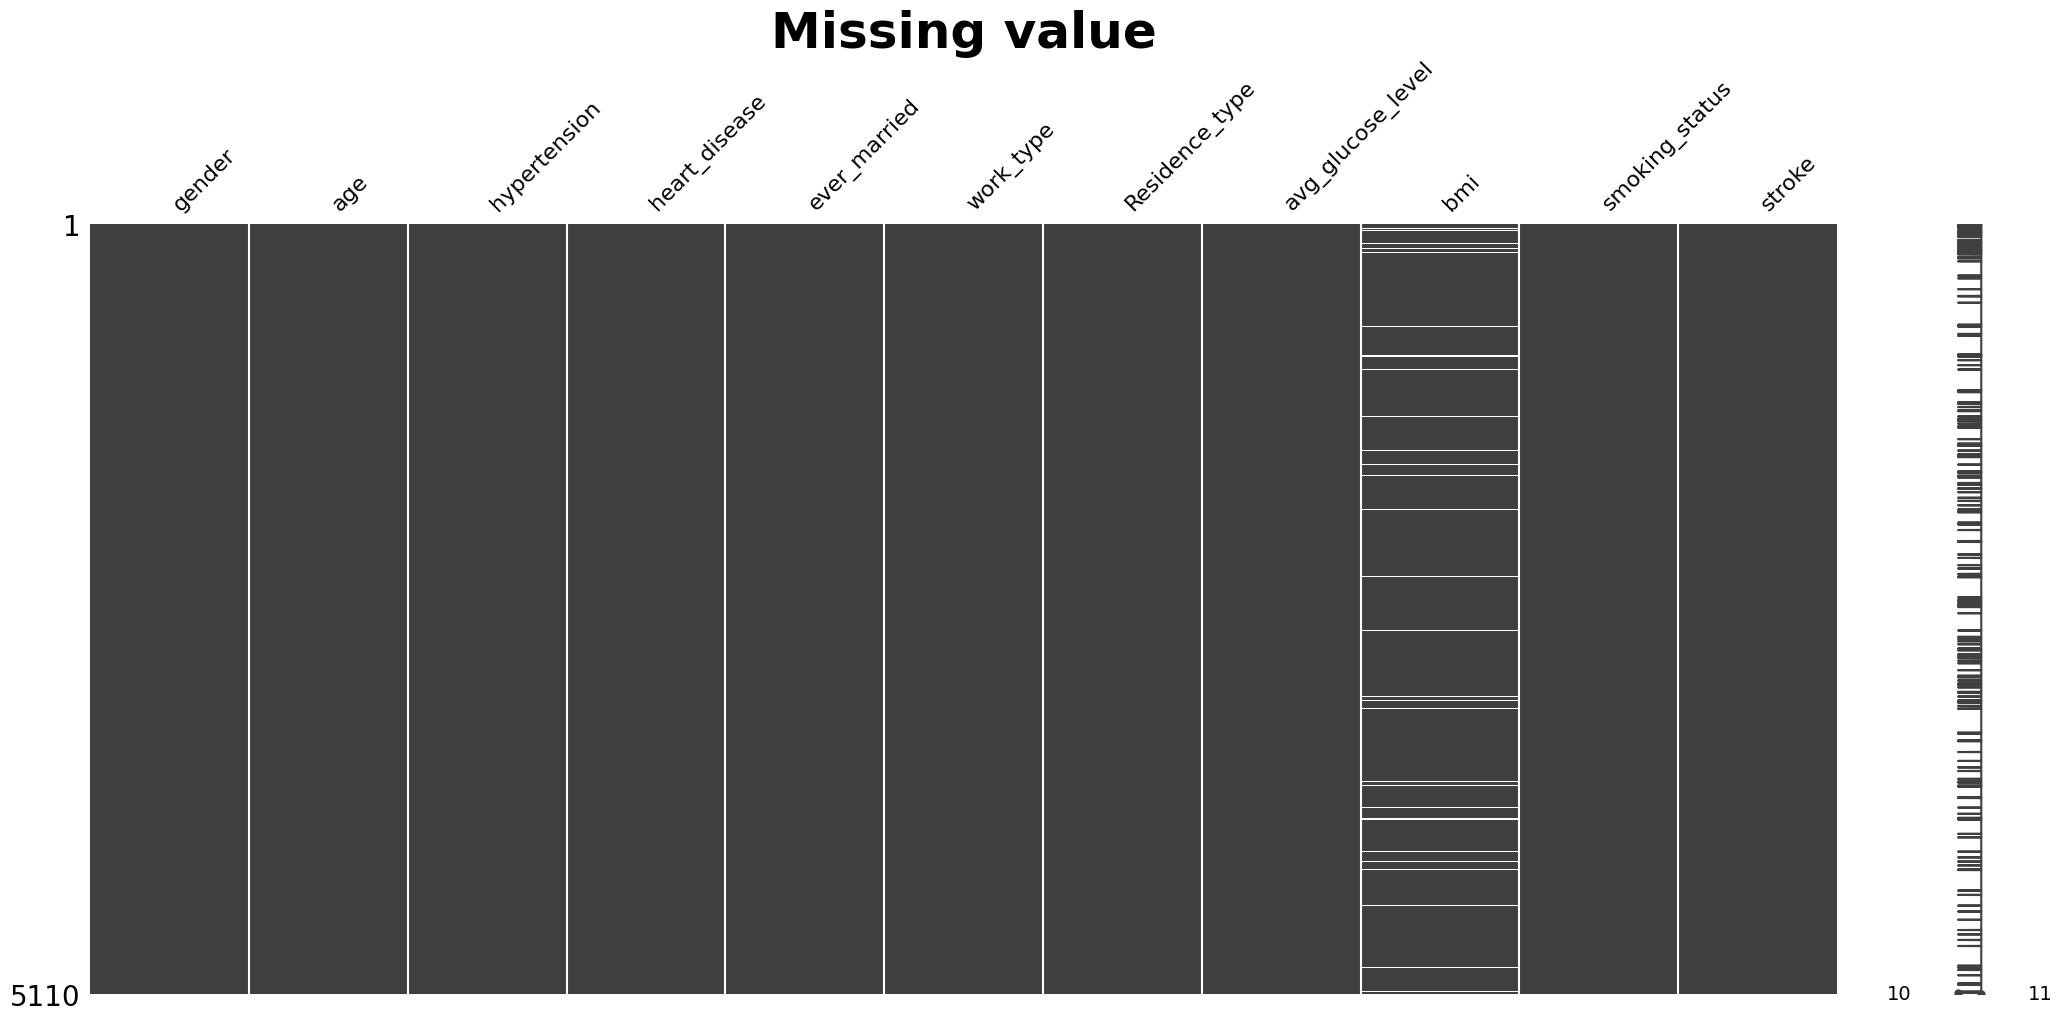

In [11]:
#search missing value
X = df_stroke.iloc[:, 1:14]  #select everything except the id column

fig = msno.matrix(X)
plt.title("Missing value", fontsize=36, fontweight='bold')
plt.show()

In [12]:
#count missing value
b_s= df_stroke.bmi.isnull().sum(axis=0), df_stroke['smoking_status'].isna().sum()
print(f'Missing value:\nbmi {b_s[0]}\nsmoking_status {b_s[1]}')

Missing value:
bmi 201
smoking_status 0


### Attribute Information

1. **id**: unique identifier

2. **gender**: Male, Female or Other

3. **age**: patient's age

4. **hypertension**: 0 patient without hypertension, 1 patient with hypertension

5. **heart disease**: 0 patient without heart disease, 1 patient with heart disease

6. **never_married**: Yes or No

7. **job type**: Never worked, Private, Self-employed, Government, Children

8. **Type_of_residence**: Rural or Urban

9. **avg_glucose_level**: Average blood glucose level

10. **bmi**: body mass index

11. **smoking_status**: has ever smoked, never smoked, smokes (or old-unknown)*

12. **stroke**: 1 if the patient has had a stroke, 0 if not

*Note: Information is not available for that patient

### Statistics of numerical data

In [13]:
round (df_stroke.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


### Statistics of categorical data

In [14]:
round (df_stroke.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


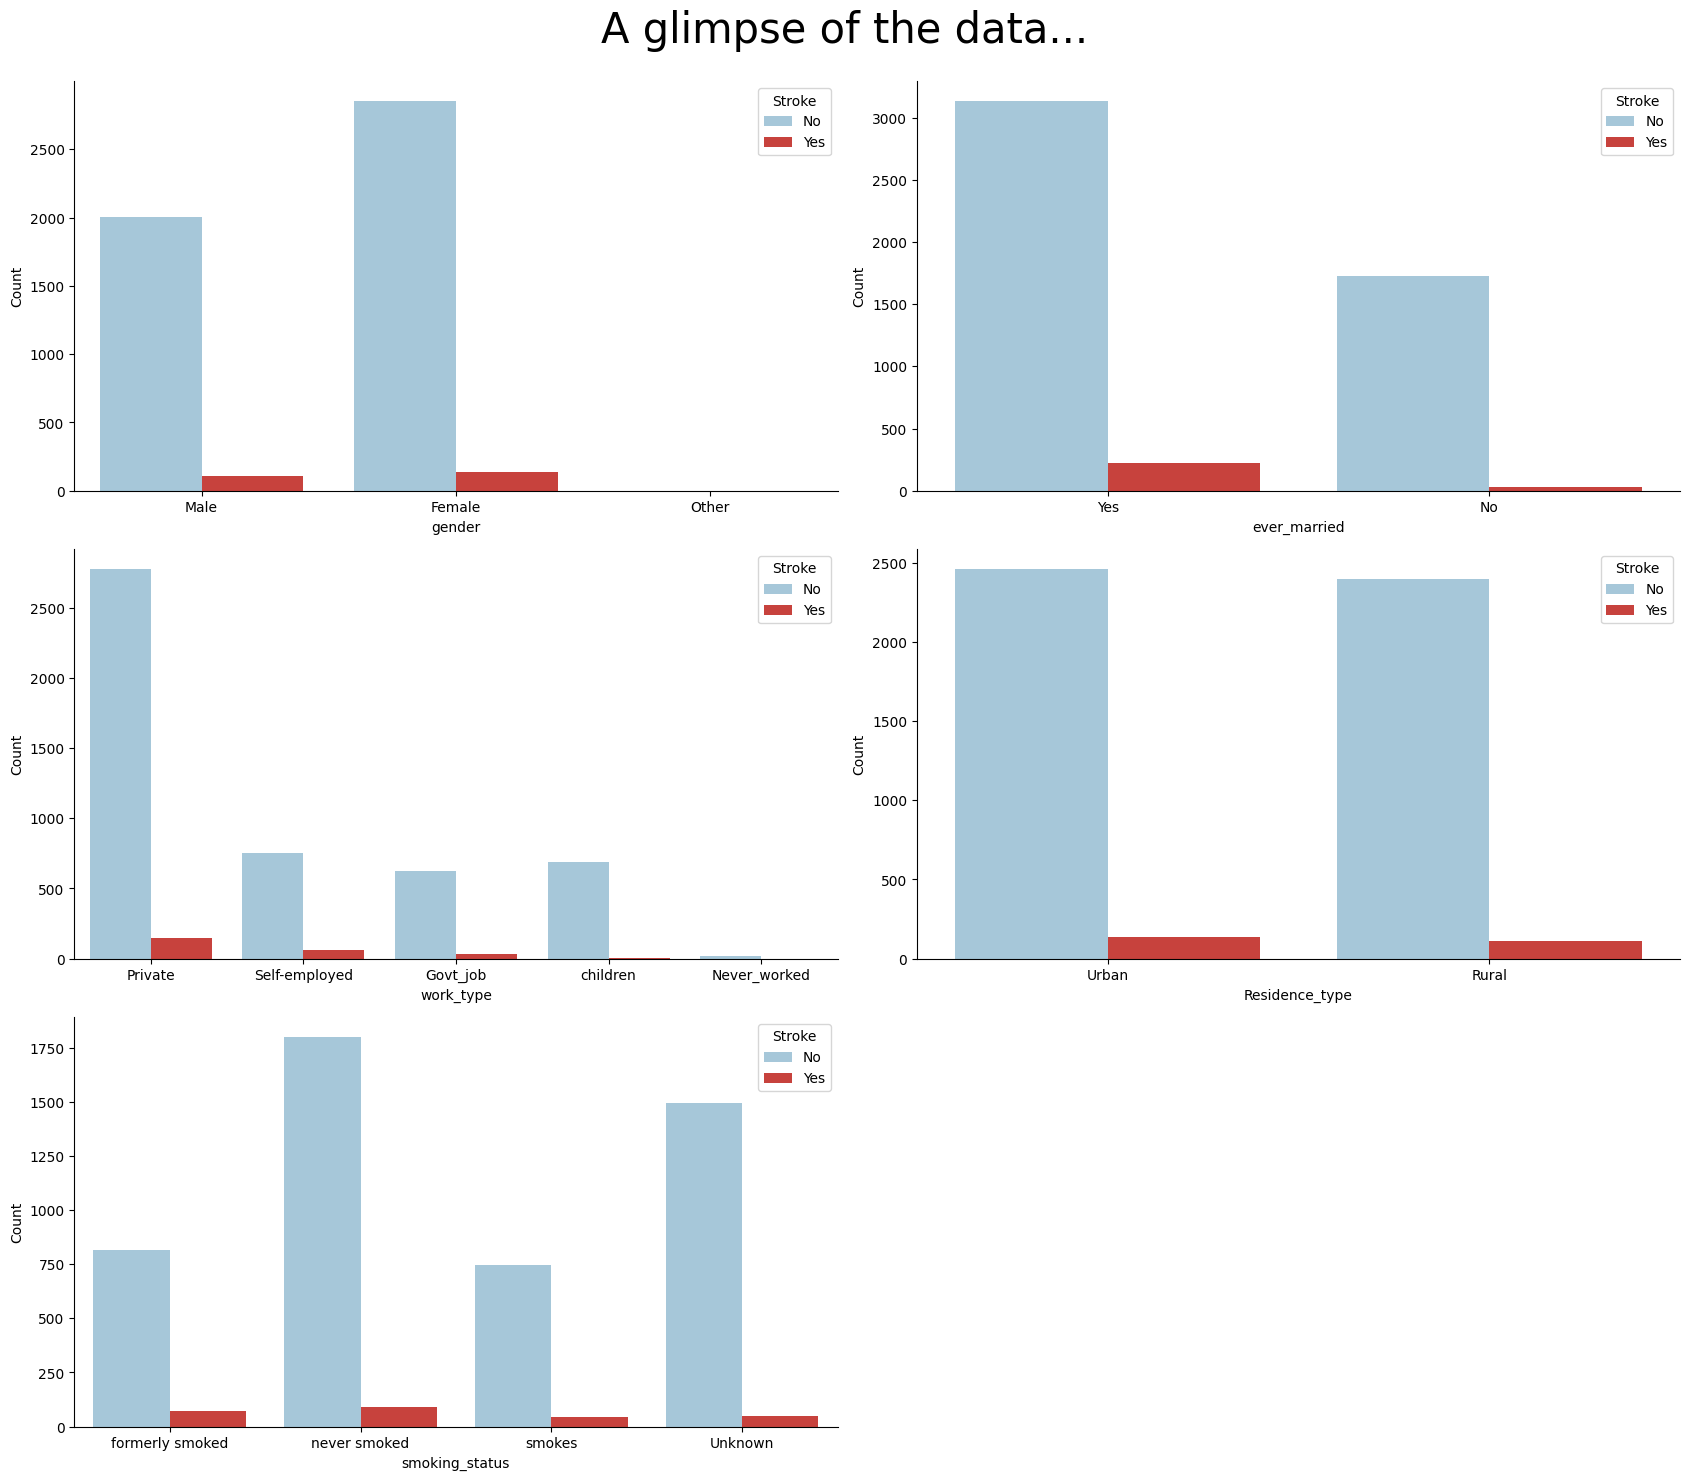

In [15]:
#stroke and categorical cata
plt.figure(figsize=(17, 19))
plt.suptitle('A glimpse of the data...', fontsize=30, y=1)
custom_palette = ['#9ecae1','#de2d26']  
sns.set_palette(custom_palette)
for i, column in enumerate(df_stroke.select_dtypes(include='object').columns, start=1):
    if column != "id":
        ax = plt.subplot(4, 2, i)
        sns.countplot(x=column, hue="stroke", data=df_stroke)
        ax.set_ylabel('Count')
        ax.legend(title='Stroke', labels=['No', 'Yes'])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
plt.tight_layout()
plt.show()

<font size="4"> Data show that those who: have been married, have a private job and have never smoked are at higher risk of stroke </font>

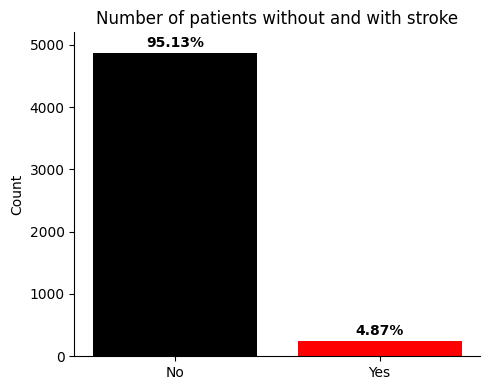

In [16]:
#graphic's stoke
categories = ['No', 'Yes']
values = [df_stroke[df_stroke['stroke'] == 0]['stroke'].count(), df_stroke[df_stroke['stroke'] == 1]['stroke'].count()]
colors = ['black', 'red']

fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(categories, values, color=colors)
ax.set_ylabel('Count')
ax.set_ylim(0, 5200)  
ax.set_title('Number of patients without and with stroke')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, value in enumerate(values):
    percentage = value / sum(values) * 100
    ax.text(i, value + 100, f'{percentage:.2f}%', ha='center', weight='bold')
plt.tight_layout()
plt.show()

In [17]:
#stoke's coloumn value
counts = df_stroke['stroke'].value_counts()
num_zeros = counts[0]
num_one = counts[1]
print(f'The stroke column has {num_zeros} values equal to 0 (No) and {num_one} values equal to 1(Yes)')

The stroke column has 4861 values equal to 0 (No) and 249 values equal to 1(Yes)


<font size="4" color=red> Very few patients have had a stroke: the dataset is unbalanced </font>

<a id = '2.3'></a>
<h1 style="font-size: 150%;">Definition of the Data Transformation Pipeline </h1>

In [18]:
#show map's transformation
display(HTML("<div style='display:flex; justify-content:center;'><img src='pipeline.png' style='max-width:100%;'></div>"))

Columns not shown in the figure are not to be transformed.

In the dataset, all columns are complete except bmi and smoking_status.

In columns with categorical data: sex, always_married, work_type, residence_type and smoking_status; OneHot Encoder can be used.

The age column has numeric variables with different scales; Standard Scaler will be used to make them uniform.

For the bmi column, KNN Imputer will be used first to replace missing values with the closest ones; then Standard Scaler will also be used to make the values uniform.

Finally, for the smoking_status column, SimpleImputer will be used first to replace missing values with the most frequent ones and then, as already mentioned, OneHot Encoder will be used to transform the values.

In [19]:
#setting up the transformations
smoking_status_pip = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(categories='auto', drop='first', handle_unknown='ignore'))
])

bmi_pip = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

final_transformation = ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(drop='first',categories='auto',handle_unknown='ignore'),['gender','ever_married','work_type','Residence_type', 'smoking_status'] ),
    ('age_column', StandardScaler(),['age']),
    ('bmi_column', bmi_pip, ['bmi'] ),
    ('smoking_status_column', smoking_status_pip, ['smoking_status'] )
],
remainder='passthrough', #non fa nulla sulle colonne non menzionate
verbose_feature_names_out=False,
sparse_threshold=0 #per ottenere l'array
)

<a id = '3'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:green;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Model Selection: stroke</h1>

In [20]:
#select data 
id = df_stroke['id']
X = df_stroke.drop(['id', 'stroke'], axis=1) 
y = df_stroke["stroke"]  #select target column

n_samples, n_features = X.shape
n_samples, n_features

(5110, 10)

In [21]:
#sets the test dataset by 20% and the training dataset by 80%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)

In [22]:
#proceed by defining a starting pipeline
model_pipeline = IMBPipeline([
    ('trans', final_transformation), #transformation of data
    ('sampler', SMOTE()), #balancing y
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [23]:
#training the model
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('age_column',
                                                  StandardScaler(), ['age']),
                                                 ('bmi_column',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('smoking_status_column',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [24]:
#predict
model_pipeline.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
#count's predict
np.set_printoptions(threshold=np.inf)
preds = model_pipeline.predict(X_test)
len(preds)

1022

In [26]:
#possible configurations
sampler_configs = [
    {
        'sampler':[None],#No dampsampling o upsampling 
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None] #No reduction
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100),
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10,15,50,100] ,
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500]
    }
]

In [27]:
#creates possible configurations to be passed to RandomSearchCV object
all_configs = []
for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs):
    # Merging of three dictionary into one
    all_parameters = []
    for element in configuration:
        for item in element.items():
            all_parameters.append(item)
    all_configs.append(dict(all_parameters)) # by dict(all_parameters) we create a dict from a list of pairs (key:value)
    
print(f'Number of possible configurations: {len(all_configs)}')

Number of possible configurations: 48


In [28]:
#select the best candidates and optimizes hyperparameters 
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=1, #processors (-1 = All)
    cv = 2,
    scoring='f1'
)

In [29]:
#cross validation
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=5) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.000 total time= 1.7min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] END ......................................., score=0.227 total time= 2.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[CV] END ......................................., score=0.000 total time= 1.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.5min remaining:    0.0s


[CV] END ......................................., score=0.271 total time= 2.0min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.5min remaining:    0.0s


[CV] END ......................................., score=0.267 total time= 1.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.0min finished


<a id = '3.1'></a>
<h1 style="font-size: 150%;">Outcome</h1>

#print information on best-performing models
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],'\n',estimator.best_estimator_.get_params()['classifier'].get_params())
    print(f"{scores['test_score'][index]*100:.2f}%")
    print('-'*10)

In [31]:
#implement the above evaluation
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.22275449101796407, F1 on test set:0.23931623931623933
F1 on training set:0.2521166509877705, F1 on test set:0.27491408934707906
F1 on training set:0.2835130970724191, F1 on test set:0.28735632183908044
F1 on training set:0.2570888468809074, F1 on test set:0.2657342657342657
F1 on training set:0.25226860254083483, F1 on test set:0.2697368421052631


<font size="4" color=magenta> The best is: </font> <font size="4"><b> LogisticRegression </font>

<a id = '3.2'></a>
<h1 style="font-size: 150%;">Refinement of the selected model</h1>

Previously, we selected one of the best candidate models. Now, we perform the hyperparameter optimization again by fixing the modelling approach and varying the hyperparameters in a range close to that of the selected 

<font size="4" color=red> ATTENZIONE </font>
---------------------- togliere prima della consegna o no? ----------------------

Tra le diverse prove effettuate questo è uno dei migliori risultati ottenuti:

SMOTE(n_jobs=-1, sampling_strategy=0.7)
LinearDiscriminantAnalysis()
LogisticRegression(C=0.0020572803799805335, penalty='l1', solver='saga') 
 {'C': 0.0020572803799805335, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
27.14%

Si può vedere che qui il dataset viene bilanciato grazie alla Synthetic Minority Over-sampling Technique (SMOTE) che genera nuovi campioni sintetici per la classe di minoranza. In questo caso il parametro "sampling_strategy=0.7" indica che la classe di minoranza sarà sovracampionata fino a raggiungere il 70% della classe di maggioranza. 


In [32]:
#sets best pipline
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE(n_jobs=-1, sampling_strategy=0.7)), #processors (-1 = All)
    ('feature_selector', LDA()),
    ('classifier',LogisticRegression(solver='saga', penalty = 'l1'))
])

In [33]:
#set up an even distribution
params = {
    'classifier__C': uniform(loc = 15, scale = 60)
}

<font size="4" color=red> ATTENZIONE </font>E' un'impostazione che può andare bene anche in questo caso???

In [44]:
#random search on the hyperparameters of the model represented by the best_model_pipeline
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [45]:
#training the model
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['gender',
                                                                                'ever_married',
                                                                                'work_type',
                                                                                'Residence_type',
                                                                                'smoking_status']),
                                                                              ('age_co...
                                                                               ['smoking_status'])],
                                                                verbose_feature_names_out=False)),
                                             ('sampler',
                                              SMOTE(n_jobs=-1,
                                                    sampling_strategy=0.7)),
                                             ('feature_selector',
                                              LinearDiscriminantAnalysis()),
                                             ('classifier',
                                              LogisticRegression(penalty='l1',
                                                                 solver='saga'))]),
                   n_iter=20,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f91d87f58b0>},
                   scoring='f1')

In [46]:
#model instance with the best found hyperparameters
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('age_column',
                                                  StandardScaler(), ['age']),
                                                 ('bmi_column',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   Stand...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['smoking_status'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(n_jobs=-1, sampling_strategy=0.7)),
                ('feature_selector', LinearDiscriminantAnalysis()),
                ('classifier',
                 LogisticRegression(C=15.209705928293198, penalty='l1',
                                    solver='saga'))])

In [58]:
#compute the F1-score on the test set
score=f1_score(y_test, rs_best.best_estimator_.predict(X_test))
m_score = round((score * 100), 2)
print(f'f1_score {m_score}%')
    

f1_score 26.62%


<font size="4" color=red> ATTENZIONE </font>
Con i nuovi parametri la percentuale del test set aumenta leggeremente (da 26,57 a 26,62)

In [59]:
cls = rs_best.best_estimator_

In [60]:
#measuring the performance of the model on training datasets of increasing size and on test datasets
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = 1,
                                                       scoring = 'f1',
                                                       shuffle = False)

<a id = '3.3'></a>
<h1 style="font-size: 150%;">Learning curves & validation curves </h1>

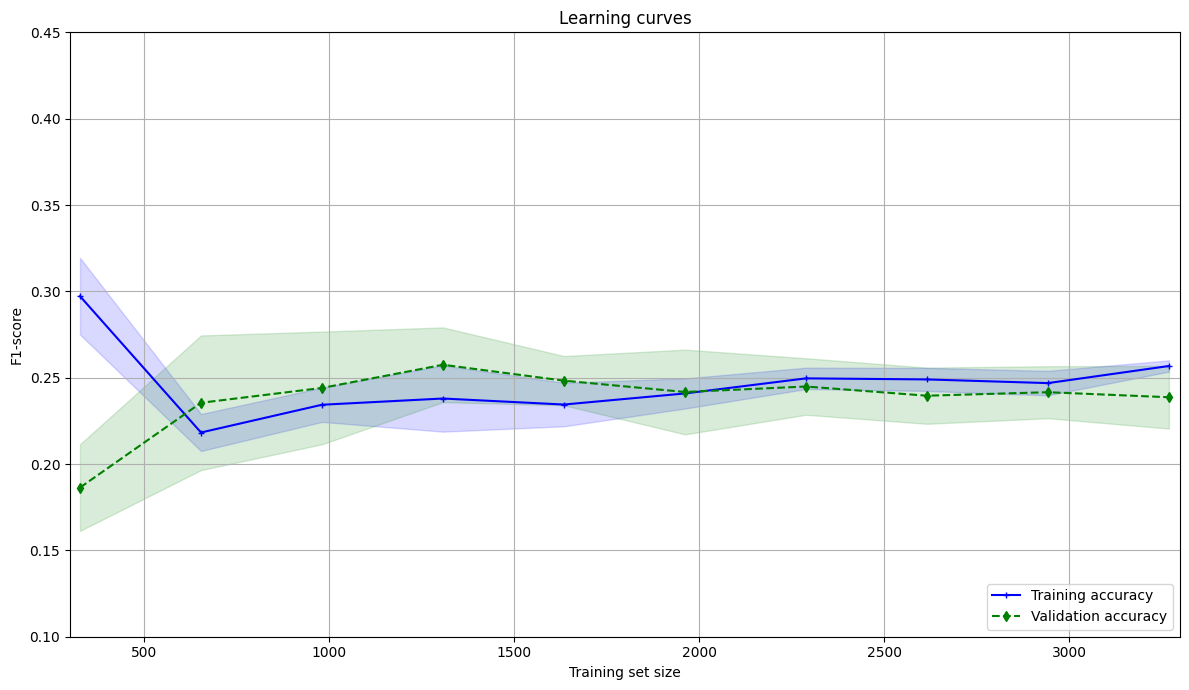

In [63]:
#learning curves
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.1, 0.45])
ax.set_xlim([300, 3300])
ax.set_title('Learning curves')
plt.tight_layout()
plt.show()

Il grafico mostra la curva di apprendimento (learning curve) per valutare come varia la performance del modello al variare della dimensione del set di addestramento.

La curva blu mostra l'accuratezza del modello sul set di addestramento, mentre la curva verde indica l'accuratezza sul set di validazione. Le aree colorate intorno alle due curve rappresentano la deviazione standard dell'accuratezza.

L'accuratezza del modello diminuisce rapidamente all'aumentare della dimensione del set di addestramento per poi risalire e quindi stabilizzarsi. Non ci sono problemi di overfitting, la linea dell'accuratezza sul set di addestramento non è mai di molto superiore a quella sul set di validazione, quindi non si sta perdendo di generalità.









-----------------
-----------------

Le linee disegnate rappresentano la media delle accuracy/f1-score ottenute dal modello sui diversi set di addestramento e di validazione, mentre le aree colorate rappresentano l'intervallo di confidenza associato a tali medie, calcolato in base alle deviazioni standard.----> da mettere?


in realtà è una varianza paragonabile a quella dell'es. Del prof e anche più piccola, quindi migliore

il vero problema è che le due curve dovrebbero tendere ad accostarsi nel lato sinistro del grafico e allontanarsi nel lato destro, mentre qui restano distanziate in tutto il grafico

Questo significa che la cd regolarizzazione non ha avuto effetto

Su questa cosa però bisognerebbe cercare di capire perché la regolarizzazione non funziona...

In [65]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__C',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

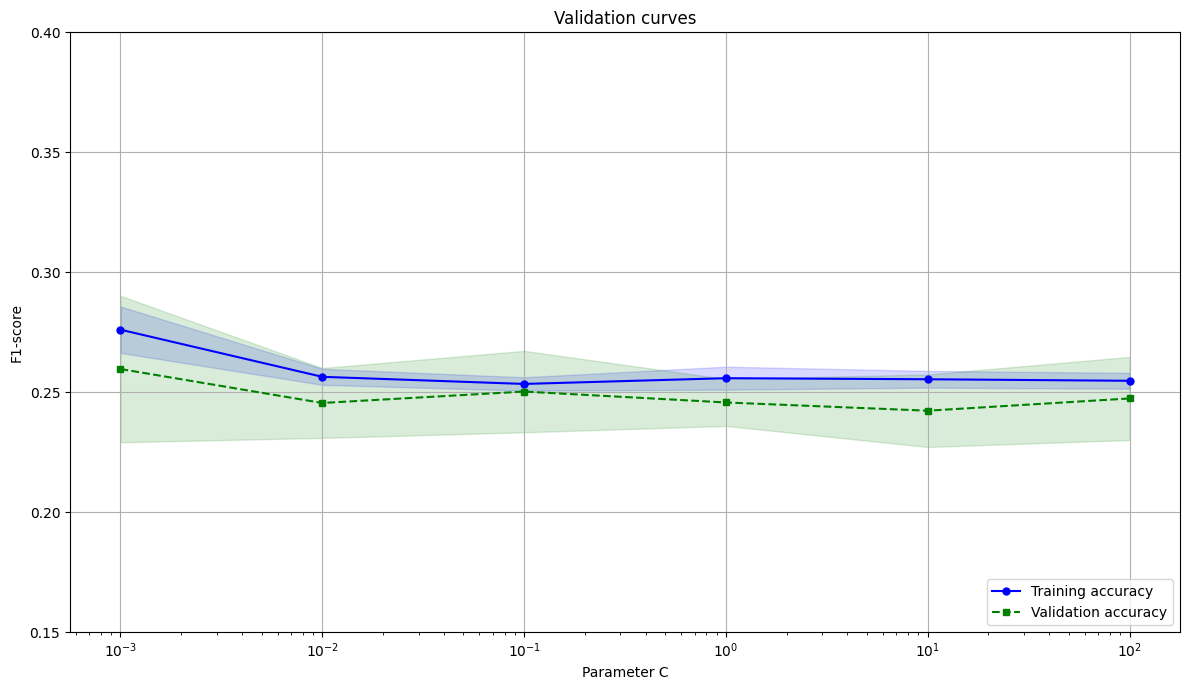

In [66]:
#validation curves
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_xscale('log')
ax.set_ylim([0.15, 0.40]) 
ax.set_title('Validation curves')
plt.tight_layout()
plt.show()

Il grafico mostra la curva di validazione (learning curve) per valutare come le prestazioni di un modello variano al variare dei parametro C.
Il modello sembra stia generalizzando bene i dati e non mostra un eccessivo adattamento ai dati di addestramento. 
????
area verde che s'ingrandisce?

<a id = '4'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:magenta;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Conclusions</h1>

da scrivere? consegna? prevede bene ictus?